In [1]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import InceptionV3, Xception

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras import layers


In [ ]:
#setting up the kaggle API in the notebook
!mkdir -p ~/.kaggle
!copy kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# downloading the dataset
# run only one time
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification
# unzipping the dataset
# !unzip cards-image-datasetclassification.zip -d cards_dataset
# run only one time
import zipfile

with zipfile.ZipFile("cards-image-datasetclassification.zip", 'r') as zip_ref:
    zip_ref.extractall("cards_dataset")

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0




  0%|          | 0.00/385M [00:00<?, ?B/s]
 42%|████▏     | 160M/385M [00:00<00:00, 1.67GB/s]
 84%|████████▎ | 322M/385M [00:00<00:00, 1.69GB/s]
100%|██████████| 385M/385M [00:00<00:00, 1.42GB/s]


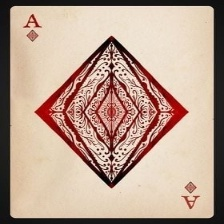

In [2]:
# visualizing the dataset
import random
from IPython.display import Image, display
folder_path = "cards_dataset/train/ace of diamonds"
# list comprehension is used here: image_files is a list
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename = image_path))

Above line can also be written as:
```
image_files = []
for f in os.listdir(folder_path):
    if f.endswith(('.jpg', '.png', '.jpeg')):
        image_files.append(f)

```

In [ ]:
# Data Augmentation:
# import tensorflow as tf
# data_augment = tf.keras.Sequential([
#     layers.RandomFlip("vertical"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ])

In [3]:
# Splitting the Dataset :
trainpath = "cards_dataset/train"
testpath = "cards_dataset/test"
valpath = "cards_dataset/valid"

# Data Augmentation using imageDataGenerator :
train_datagen = ImageDataGenerator(
    rescale = 1/255, # normalising the image
    zoom_range = 0.2, # zoom
    shear_range = 0.2, # stretch and contract
    vertical_flip=True #flip vertically
)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=16
)

test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=16
)

val = val_datagen.flow_from_directory(
    valpath,
    target_size=(224, 224),
    batch_size=16
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


# **NOTES:**

```.flow_from_directory```  
✅ Goes into your folder  
✅ Reads all the images  
✅ Automatically labels them based on folder names  
✅ Applies augmentations from train_datagen  
✅ Returns a generator (like a never-ending supply of image batches)  

```target_size=(224, 224)```  
Yeh har image ko resize karta hai 224x224 pixels mein.  
🧠 Note: Most pre-trained models like VGG, ResNet, etc. expect this size.  

```batch_size=16```  
This tells the generator to give 16 images at a time during training.  
So: 1 step = 16 images  
1 epoch = (total_images / batch_size) steps  